# TP14 : Dictionnaires

Un _dictionnaire_ est une structure de données `python` qui permet d'associer une clef à une valeur (comme une fonction mathématique qui serait définie sur un domaine fini en quelque sorte).

Les valeurs peuvent être d'un type quelconque, mais il y a des restrictions sur les ensembles possibles de clefs: les clefs peuvent prendre leurs valeurs dans tous les types que nous avons déjà croisés, sauf les listes et les dictionnaires. Les symboles de délimitation d'un dictionnaire sont des accolades `{` `}`. Par ailleurs une clef ne peut apparaître plusieurs fois (de même qu'une fonction mathématique ne peut associer plusieurs valeurs à une valeur donnée).

Pour obtenir un dictionnaire vide:

In [6]:
{ }

{}

En première approximation, on peut imaginer les dictionnaires comme des structures permettant de stocker des données nommées plutôt que numérotées (à comparer avec les listes):

In [7]:
d = { 'a' : 1, 'e' : 2, 'i' : 3, 'o' : 4, 'u' : 5}

In [8]:
d['a']

1

In [9]:
d['u']

5

Si on essaie d'accéder à la valeur associée à une clef inexistante, on a un message d'erreur:

In [10]:
d['b']

KeyError: 'b'

On peut savoir si une clef appartient au dictionnaire avec le mot-clef `in`:

In [11]:
'b' in d   # notez les quote : la clef à tester est la chaîne 'b', pas la variable b

False

Ce qui permet de ne récupérer une valeur que si la clef existe :

In [12]:
if 'b' in d:
    pass # action à faire si 'b' est un clef de d
else:
    pass # action à faire sinon

En fait rien n'oblige à ce que les clefs d'un dictionnaire soient toutes du même type (mais je ne suis pas sûre que ce soit souvent justifié d'utiliser des clefs de types différents):

In [13]:
{'a' : 'chaine', -1 : 'entier', 3.2 : 'flottant', True : 'booleen'}

{'a': 'chaine', -1: 'entier', 3.2: 'flottant', True: 'booleen'}

Rien n'oblige non plus à ce que toutes les valeurs soient du même type :

In [14]:
{'a' : 'p', 'b' : 1, 'c' : True, 3 : [1, 2, 3]}

{'a': 'p', 'b': 1, 'c': True, 3: [1, 2, 3]}

On peut itérer sur les clefs d'un dictionnaires grâce à la méthode `keys` :

In [15]:
for clef in d.keys():
    print(clef)

a
e
i
o
u


Mais on peut aussi itérer sur les couples (clef, valeur) grâce à la méthode `items`:

In [16]:
for couple in d.items():  # on récupère le couple dans un tuple (on reviendra sur ce type)
    print('couple : ' + str(couple))
    
print()
    
for clef, valeur in d.items():  # on dépaquète directement le tuple
    print('clef : ' + str(clef) + ' / valeur : ' + str(valeur))

couple : ('a', 1)
couple : ('e', 2)
couple : ('i', 3)
couple : ('o', 4)
couple : ('u', 5)

clef : a / valeur : 1
clef : e / valeur : 2
clef : i / valeur : 3
clef : o / valeur : 4
clef : u / valeur : 5


On obtient le nombre d'éléments d'un dictionnaire avec la fonction `len` :

In [17]:
len(d)

5

Quand un dictionnaire existe déjà, on peut modifier la valeur associée à une de ses clefs ou ajouter une nouvelle association de la manière suivante:

In [18]:
d['a'] = 0
d['y'] = 6
d

{'a': 0, 'e': 2, 'i': 3, 'o': 4, 'u': 5, 'y': 6}

## Exercice 1 : tri
On souhaite trier un tableau d'entiers positifs en comptant les occurences de chaque valeur qui y apparaît.

1. Écrire et documenter une fonction `denombre` qui prend une liste d'entiers en argument et renvoie un dictionnaire qui permet d'avoir le nombre d'occurence de chacun de ses arguments.

In [19]:
###BEGIN SOLUTION
def denombre(L):
    nb = {}
    for i in L:
        if i in nb:
            nb[i] = nb[i] + 1
        else:
            nb[i] = 1
    return nb
###END SOLUTION

In [20]:
assert(denombre([]) == {})
assert(denombre([15356]) == {15356: 1})
assert(denombre([0,0,0,0]) == {0: 4})
assert(denombre([0,0,0,1,1,1,1,1,3,3,3]) == {0: 3, 1: 5, 3: 3})
assert(denombre([3,7,2,9,1,0,3]) == {3: 2, 7: 1, 2: 1, 9: 1, 1: 1, 0: 1})

2. Écrire et documenter une fonction `tri` qui prend en argument une liste d'entiers positifs et renvoie une nouvelle liste triée composée des mêmes valeurs, en utilisant la fonction `denombre` et la fonction `max` (qui renvoie le maximum d'une liste, mais aussi le maximum des clefs d'un dictionnaire).

In [21]:
###BEGIN SOLUTION
def tri(L):
    if len(L) == 0:
        return []
    d = denombre(L)
    L2 = []
    for i in range(max(d) + 1):
        if i in d:
            L2.extend([i] * d[i])
    return L2
###END SOLUTION

In [22]:
assert(tri([]) == [])
assert(([15356]) == [15356])
assert(tri([0,0,0,0]) == [0,0,0,0])
assert(tri([0,0,0,1,1,1,1,1,3,3,3]) == [0,0,0,1,1,1,1,1,3,3,3])
assert(tri([3,3,3,1,1,1,1,1,0,0,0]) == [0,0,0,1,1,1,1,1,3,3,3])
assert(tri([3,7,2,9,1,0,3]) == [0, 1, 2, 3, 3, 7, 9])

## Exercice 2 : fréquence des lettres en Français
Pour cet exercice, on se base sur le texte [Emile.txt](Emile.txt) (texte de _Emile_ de Rousseau que vous connaissez bien). On désire connaître la fréquence de chaque lettre dans ce texte.

1. Écrire et documenter une fonction `occurences` qui prend en argument un nom de fichier et renvoie un dictionnaire avec le nombre d'apparition de chaque caractère (lettre ou autre, sans distinction) dans ce texte.

In [23]:
###BEGIN SOLUTION
def occurences(fichier):
    file = open(fichier)
    d = denombre(file.read())
    file.close()
    return d
###END SOLUTION

In [24]:
assert(occurences('vide') == {})

d = occurences('Emile.txt')
assert(d['T'] == 357 and d['u'] == 75714 and d['J'] == 841)

2. Écrire et documenter une fonction `frequences` qui prend en argument un dictionnaire dont on suppose (sans avoir à le vérifier) que les valeurs sont des nombres et renvoie la liste des couples (clef,valeur) dans l'ordre décroissants des valeurs. Pour accéder aux composantes des couples, on utilise la même notation que pour accéder aux cases des listes : `c[0]` par exemple.

In [25]:
###BEGIN SOLUTION
def frequences(d):
    return [ couple for couple in sorted([item for item in d.items()], key=lambda c: c[1], reverse = True) ]
###END SOLUTION

In [26]:
assert(frequences({}) == [])
assert(frequences({0: 1}) == [(0, 1)])
assert(frequences({3: 6, 7: 5, 2: 4, 9: 3, 1: 2, 0: 1}) == [(3, 6), (7, 5), (2, 4), (9, 3), (1, 2), (0, 1)])
assert(frequences({'a':23, 'e':12, 'i':7423, 'o':32112, 'y':2}) == 
       [('o', 32112), ('i', 7423), ('a', 23), ('e', 12), ('y', 2)])
d = occurences('Emile.txt')
assert(frequences(d)[1] == ('e', 172160) and frequences(d)[42] == ('J', 841))

3. On veut maintenant se restreindre à regarder les lettres d'un texte et pas tous les caractères. La méthode `isalpha` sur les chaînes de caractères permet de déterminer si une chaîne ne contient que des lettres ou pas :

In [27]:
'abcde'.isalpha()

True

In [28]:
'abcd5'.isalpha()

False

Écrire et documenter une fonction `que_lettres` qui prend en argument une liste de couple comme renvoyée par `frequence` et renvoie la liste des seuls couples dont la première composante est une lettre (en conservant l'ordre d'apparition).

In [29]:
###BEGIN SOLUTION
def que_lettres(L):
    return [(c, f) for (c, f) in L if c.isalpha() ]
###END SOLUTION

In [30]:
L = que_lettres(frequences(occurences('Emile.txt')))
assert(L[17] == ('f', 12495) and L[42] == ('A', 552))

4. On souhaite représenter tout cela sous forme  d'un diagramme camembert. Voici un exemple d'utilisation d'un tel diagramme :

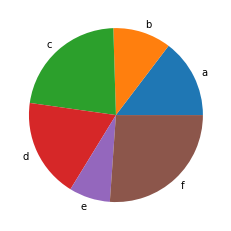

In [31]:
from matplotlib import pyplot  # si ça ne fonctionne pas, retournez au TP de Noel pour installer ce qu'il faut

donnees = [23, 17, 35, 29, 12, 41]
legende = ['a', 'b', 'c', 'd', 'e', 'f']

pyplot.pie(data, labels=legende)
pyplot.show()

Écrire et documenter une fonction `statistiques` qui prend en argument une liste de couples comme renvoyés par la fonction `frequences` et affiche le diagramme camembert correspondant, dans l'ordre des fréquences.

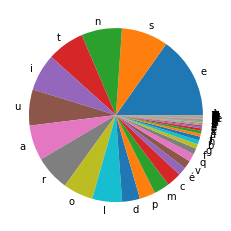

In [33]:
###BEGIN SOLUTION
from matplotlib import pyplot

L = que_lettres(frequences(occurences('Emile.txt')))
pyplot.pie([ f for (ll, f) in L ], labels = [ ll for (ll, f) in L ] ) 
pyplot.show()
###END SOLUTION

Pour vous aidez à vérifier, voici mes propres statistiques sur ce texte :
    ![](mes_stats.png)

Describe the task here!

## Exercice 3 : déchiffre un texte mystère
En combinant ce qui a été fait dans l'exercice précédent, trouver le texte [mystere.txt](mystere.txt) où les lettre ont été modifiée : seules les lettres non accentuées ont été modifiées, chaque occurence d'une lettre a été remplacée par la même lettre, ce remplacement est injectif.

Describe the task here!

<div class="alert alert-success">
    <h2>Les points à retenir</h2>
    
* principe du dictionnaire : création, accès, ajout d'élément
* présence d'une clef dans un dictionnaire avec le mot-clef `in`
* couples `(x, y)`: accès aux composantes séparément
</div>